### Texture Synthesis Using Convolutional Neural Networks (Gatys et al.)
(Source: https://arxiv.org/abs/1505.07376)

Following the implementation in caffe at https://github.com/leongatys/DeepTextures/blob/master/Example.ipynb

Likely a good start for using pyTorch at https://github.com/honzukka/texture-synthesis-pytorch

In [1]:
%matplotlib inline

import os
import glob
import sys

import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image


base_dir = os.getcwd()
sys.path.append(base_dir)
sys.path.append(os.path.join(base_dir, 'texture_synthesis_pytorch'))
im_dir = os.path.join(base_dir, 'images/')

target_image_name = 'circuit_board.jpg'

import utilities
import model
import optimize

imagenet_mean = np.array([ 0.48501961,  0.45795686, 0.40760392 ]) # Imagenet Mean (RGB)

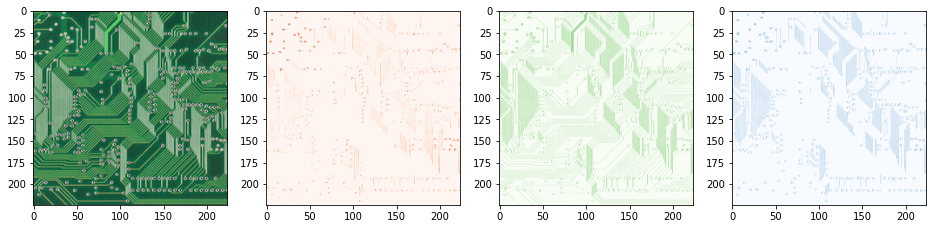

In [2]:
def load_image(file_name, resize_shape=None, vmax=255., mean=imagenet_mean, normalize=True, show_img=False):
    img = Image.open(os.path.join(im_dir, file_name))
    img = np.array(img, dtype=float)
    img /= vmax
    
    if resize_shape is not None:
        img = cv2.resize(img, resize_shape)
    
    if show_img:
        plt.imshow(img)
    
    if normalize:
        img[:,:,0] -= mean[0]
        img[:,:,1] -= mean[1]
        img[:,:,2] -= mean[2]
             
    return img

img = load_image(target_image_name, resize_shape=(224,224))

fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(load_image(target_image_name, normalize=False))
axs[1].imshow(img[:,:,0], vmin=0, vmax=1, cmap='Reds')
axs[2].imshow(img[:,:,1], vmin=0, vmax=1, cmap='Greens')
axs[3].imshow(img[:,:,2], vmin=0, vmax=1, cmap='Blues')

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

target_image = utilities.preprocess_image(utilities.load_image(os.path.join(im_dir, target_image_name)))

vgg_model = model.Model(os.path.join(base_dir, 'models', 'VGG19_normalized_avg_pool_pytorch'), device, target_image)
vgg_model.net

Sequential(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU(inplace=True)
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU(inplace=True)
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU(inplace=True)
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU(inplace=True)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU(inplace=True)
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU(inplace=True)
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_3): ReLU(inplace=True)
  (conv3_4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3

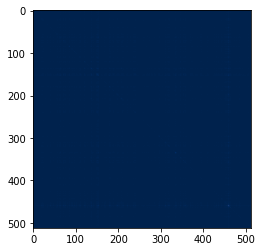

In [4]:
def gram_matrix(activations):
    N = activations.shape[1]
    F = activations.reshape(N, -1)
    M = F.shape[1]
    G = np.dot(F, F.T) / M
    return G

g = gram_matrix(vgg_model(target_image).detach().numpy())
plt.imshow(g, cmap='cividis')

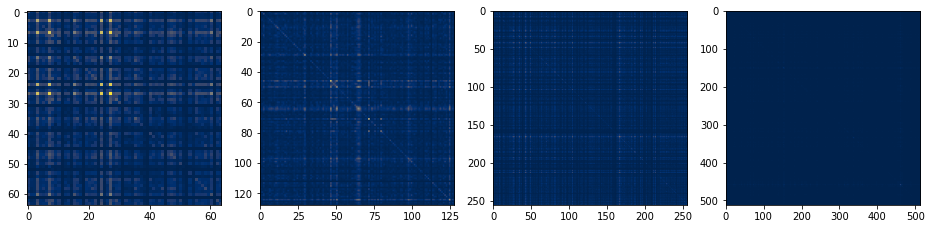

In [8]:
def plot_gram_at(last_layer_index):
    partial_net = torch.nn.Sequential()
    for idx, layer in enumerate(list(vgg_model.net)[0:last_layer_index+1]):
        partial_net.add_module(str(idx), layer)

    vgg_model.gram_loss_hook.clear()
    output = partial_net(target_image)
    return gram_matrix(output.detach().numpy())

fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].imshow(plot_gram_at(4), cmap='cividis')
axs[1].imshow(plot_gram_at(9), cmap='cividis')
axs[2].imshow(plot_gram_at(18), cmap='cividis')
axs[3].imshow(plot_gram_at(27), cmap='cividis')

step: 1, loss: 2656505344.0 (30.43s)


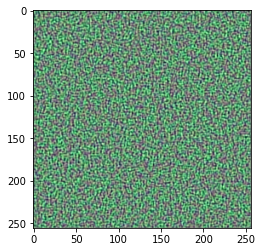

step: 2, loss: 616477248.0 (19.89s)


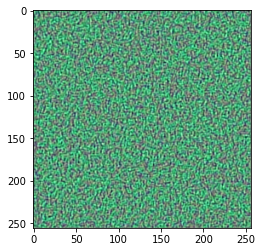

step: 3, loss: 160134576.0 (19.87s)


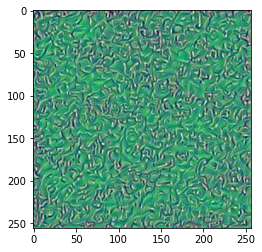

step: 4, loss: 41973280.0 (23.19s)


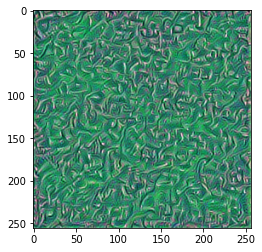

step: 5, loss: 20419040.0 (19.86s)


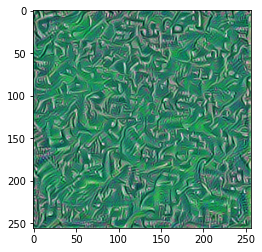

step: 6, loss: 13587524.0 (19.91s)


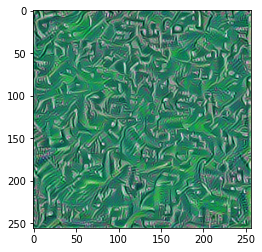

step: 7, loss: 10354489.0 (19.86s)


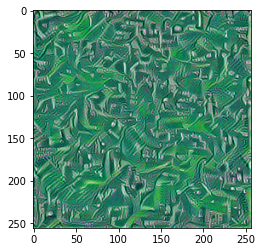

step: 8, loss: 6874386.0 (19.98s)


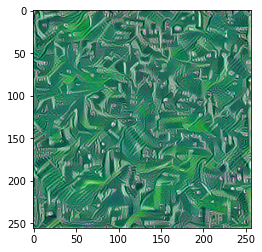

step: 9, loss: 5702744.0 (19.88s)


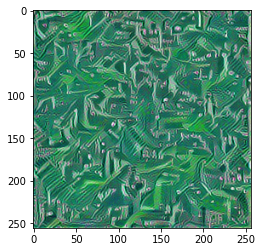

step: 10, loss: 4642141.0 (19.88s)


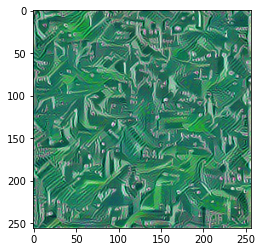

step: 11, loss: 3964716.5 (19.88s)


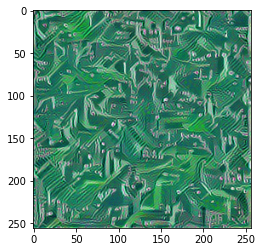

step: 12, loss: 3263986.25 (19.88s)


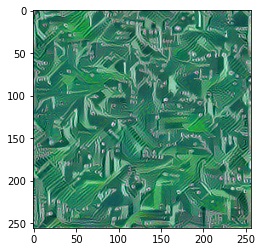

step: 13, loss: 2837740.0 (19.88s)


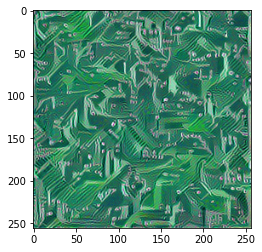

step: 14, loss: 2486737.5 (20.15s)


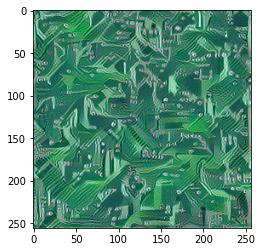

step: 15, loss: 2136381.5 (19.94s)


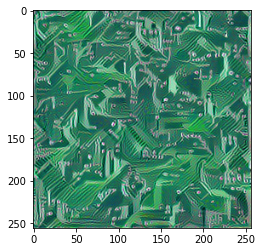

step: 16, loss: 1954498.25 (19.94s)


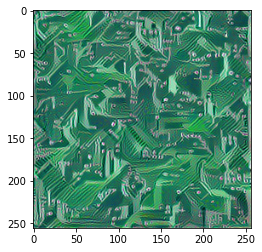

step: 17, loss: 1757901.375 (19.95s)


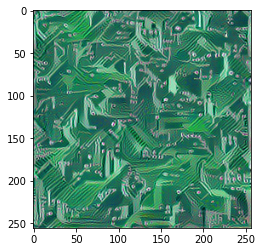

step: 18, loss: 1559261.5 (23.29s)


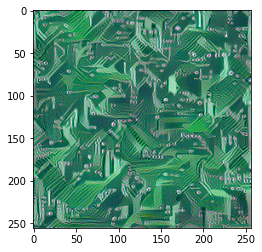

step: 19, loss: 1409719.75 (19.92s)


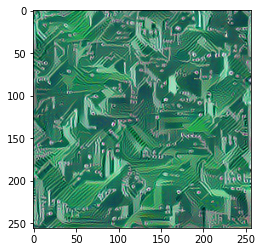

step: 20, loss: 1335125.5 (20.32s)


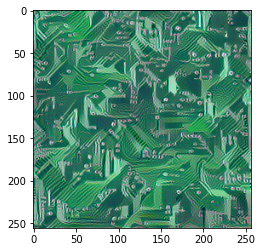

step: 21, loss: 1197955.5 (24.33s)


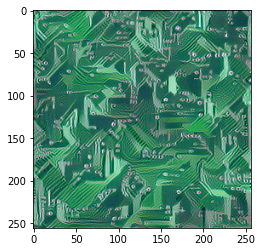

step: 22, loss: 1106774.625 (19.94s)


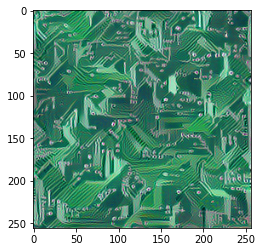

step: 23, loss: 1041367.25 (19.98s)


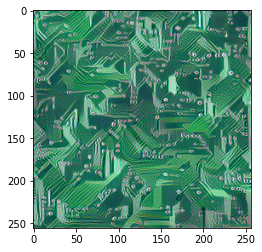

step: 24, loss: 990124.5625 (19.94s)


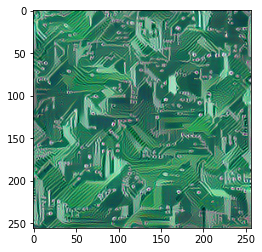

step: 25, loss: 924724.5625 (19.98s)


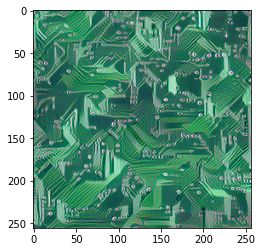

step: 26, loss: 899399.0 (20.40s)


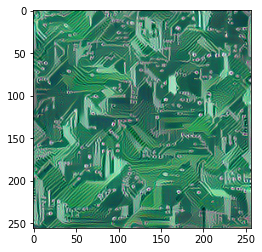

step: 27, loss: 855213.5 (19.94s)


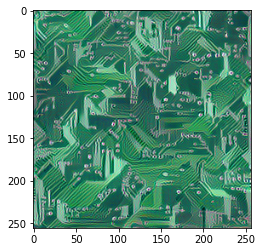

step: 28, loss: 814643.625 (20.00s)


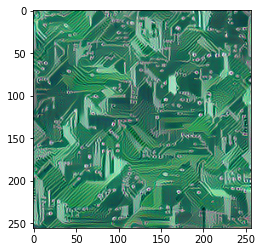

KeyboardInterrupt: 

In [6]:
import utilities
import model
import optimize

import importlib
importlib.reload(utilities)
importlib.reload(model)
importlib.reload(optimize)


import collections.abc as container_abcs

from argparse import Namespace
args = Namespace(**{
    'checkpoint_every': 1,
    'n_steps': 100,
    'max_iter': 5,
    'lr': 1.0
})

optimizer = optimize.Optimizer(vgg_model, args)
result = optimizer.optimize()

final_image = utilities.postprocess_image(result, utilities.load_image(os.path.join(im_dir, target_image_name)))
final_image.save('output.png')
